## All imports:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.float_format', lambda x: '%.1f' % x)

## Working with data:
###### importing apple store data:

In [2]:
apple_store = pd.read_csv("appstore/AppleStore.csv")
apple_store_desc = pd.read_csv("appstore/appleStore_description.csv")
# importing all data for AppStore 


apple_store = apple_store.drop(['id', 'Unnamed: 0'], axis=1).astype({'size_bytes': 'int64',})\
.rename({'rating_count_tot': 'rating_count_total', 'user_rating': 'rating', 'track_name': 'app'}, axis=1)

apple_store.prime_genre.replace('Book', 'Books & Reference', inplace = True)
apple_store.prime_genre.replace('Reference', 'Books & Reference', inplace = True)

##### importing and cleaning google play data:

In [3]:
google_play_store = pd.read_csv("googleplay/googleplaystore.csv")
google_play_store_reviews = pd.read_csv("googleplay/googleplaystore_user_reviews.csv")

In [4]:
# make apple store genres and google play store categories with equal names
# todo music in google play

google_play_store['Genres'] = google_play_store['Genres'].str.split(';').str[0]

google_play_store['Genres'].replace('Music & Audio', 'Music', inplace = True)
google_play_store['Genres'].replace('Music & Video', 'Music', inplace = True)

dict_categories = {'GAME': 'Games', 'PRODUCTIVITY': 'Productivity', 'WEATHER': 'Weather', 'SHOPPING': 'Shopping', 'FINANCE': 'Finance',\
                  'TOOLS': 'Utilities', 'PERSONALIZATION': 'Utilities', 'TRAVEL_AND_LOCAL': 'Travel', 'SOCIAL': 'Social Networking', \
                   'DATING': 'Social Networking', 'COMMUNICATION': 'Social Networking', 'SPORTS': 'Sports', 'BUSINESS': 'Business',\
                  'HEALTH_AND_FITNESS': 'Health & Fitness', 'BEAUTY': 'Health & Fitness', 'ENTERTAINMENT': 'Entertainment', 'COMICS': 'Entertainment',\
                   'VIDEO_PLAYERS': 'Photo & Video', 'PHOTOGRAPHY': 'Photo & Video', 'ART_AND_DESIGN': 'Photo & Video', 'MAPS_AND_NAVIGATION': 'Navigation',\
                  'EDUCATION': 'Education', 'PARENTING': 'Education', 'LIFESTYLE': 'Lifestyle', 'EVENTS': 'Lifestyle', 'HOUSE_AND_HOME':\
                   'Lifestyle', 'AUTO_AND_VEHICLES': 'Lifestyle', 'FAMILY': 'Lifestyle', 'FOOD_AND_DRINK': 'Food & Drink', 'NEWS_AND_MAGAZINES':\
                   'News', 'MEDICAL': 'Medical', 'LIBRARIES_AND_DEMO': 'Catalogs', 'BOOKS_AND_REFERENCE': 'Books & Reference'
                  } 
for i in dict_categories.keys():
    google_play_store['Category'].replace(i, dict_categories[i], inplace = True)

In [5]:
for index in google_play_store.index:
    size = google_play_store.loc[index, 'Size']
    installs = google_play_store.loc[index, 'Installs']
    price = google_play_store.loc[index, 'Price']
    if installs.find("+") != -1:
        google_play_store.loc[index, 'Installs'] = installs[:-1].replace(",", "")
    if size.find("M") != -1:
        google_play_store.loc[index, 'Size'] = float(size[:-1]) * 125000 
        # removing "M" changing type from str to float and converting to bytes 
    elif size.find("k") != -1:
        google_play_store.loc[index, 'Size'] = float(size[:-1]) * 1000 
        # removing "k" changing type from str to float and converting to bytes 
    elif size.find('Varies') != -1:
        google_play_store.loc[index, 'Size'] = -1
    if price.find("$") != -1:
        google_play_store.loc[index, 'Price'] = price[1:]
    if google_play_store.loc[index, 'Genres'] == 'Music':
        google_play_store.loc[index, 'Category'] = 'Music'

        
google_play_store = google_play_store.astype({"Reviews": 'int32', "Rating": float, "Installs": 'int32', "Size": float, 'Price': float})\
.rename({'Size': 'size_bytes', 'Reviews': 'rating_count_total', 'Rating': 'rating', 'App': 'app', 'Current Ver': "ver", 'Price': 'price', 'Installs': 'installs'}, axis=1)


In [6]:
google_play_store["rating"] = google_play_store["rating"].fillna(google_play_store["rating"].median())
#replacing all NaN values with median of column 'rating'

In [7]:
# all apps with price above 110 is just "i am rich" and "most expensive app" so i think we can easily remove them
google_play_store = google_play_store[google_play_store['price'] <= 80]
#google_play_store[google_play_store['price'] > 60] # uncomment and run to see all expensive apps

In [8]:
apple_store = apple_store[apple_store['price'] <= 80]
#apple_store[apple_store['price'] > 60 ] # uncomment and run to see all expensive apps

In [9]:
# top rated apps for google where amount of reviews is more than 300
google_play_top = google_play_store[(google_play_store["rating_count_total"] > 300) & (google_play_store["rating"] >= 4.9)].sort_values(by=["rating_count_total"]) 
# top rated apps for google where amount of reviews is more than 300
apple_top = apple_store[(apple_store["rating_count_total"] > 300) & (apple_store["rating"] >= 4.9)].sort_values(by=["rating_count_total"]) 


#### After cells above:
    google_play_store :
        * reviews, installs are now type:int32
        * rating, size, price are now type:float
        * size now is int and it is in bytes
        * rating - plus "+" sign removed
        * junk/scam apps like "i am rich" with price 400 removed
        
    apple_store : (нехватает конечно количества скачиваний но можно написать примерное количество исходя из соотношения кол-ва оценок/кол-во скачиваний в гуглплэй)
        *

#### Cell bellow is for playing with dataframes

<IPython.core.display.Javascript object>


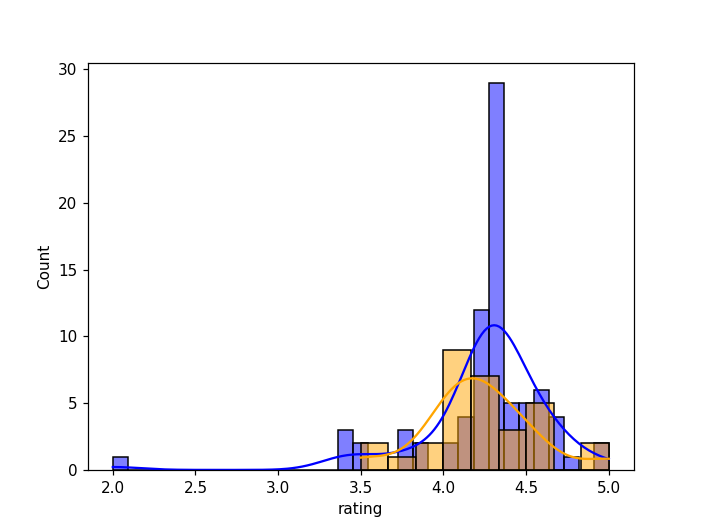

<AxesSubplot:xlabel='rating', ylabel='Count'>

In [10]:
%matplotlib notebook

paid_apps_apple = apple_store[(apple_store['price'] != 0.0) & apple_store['rating'] > 0.0] 
paid_apps_google = google_play_store[(google_play_store['price'] != 0.0) & google_play_store['rating'] > 0.0] 
sns.histplot(paid_apps_google.groupby("price").mean()['rating'], kde=True, color='blue')
sns.histplot(paid_apps_apple.groupby("price").mean()['rating'],
             kde=True, color='orange')


<IPython.core.display.Javascript object>


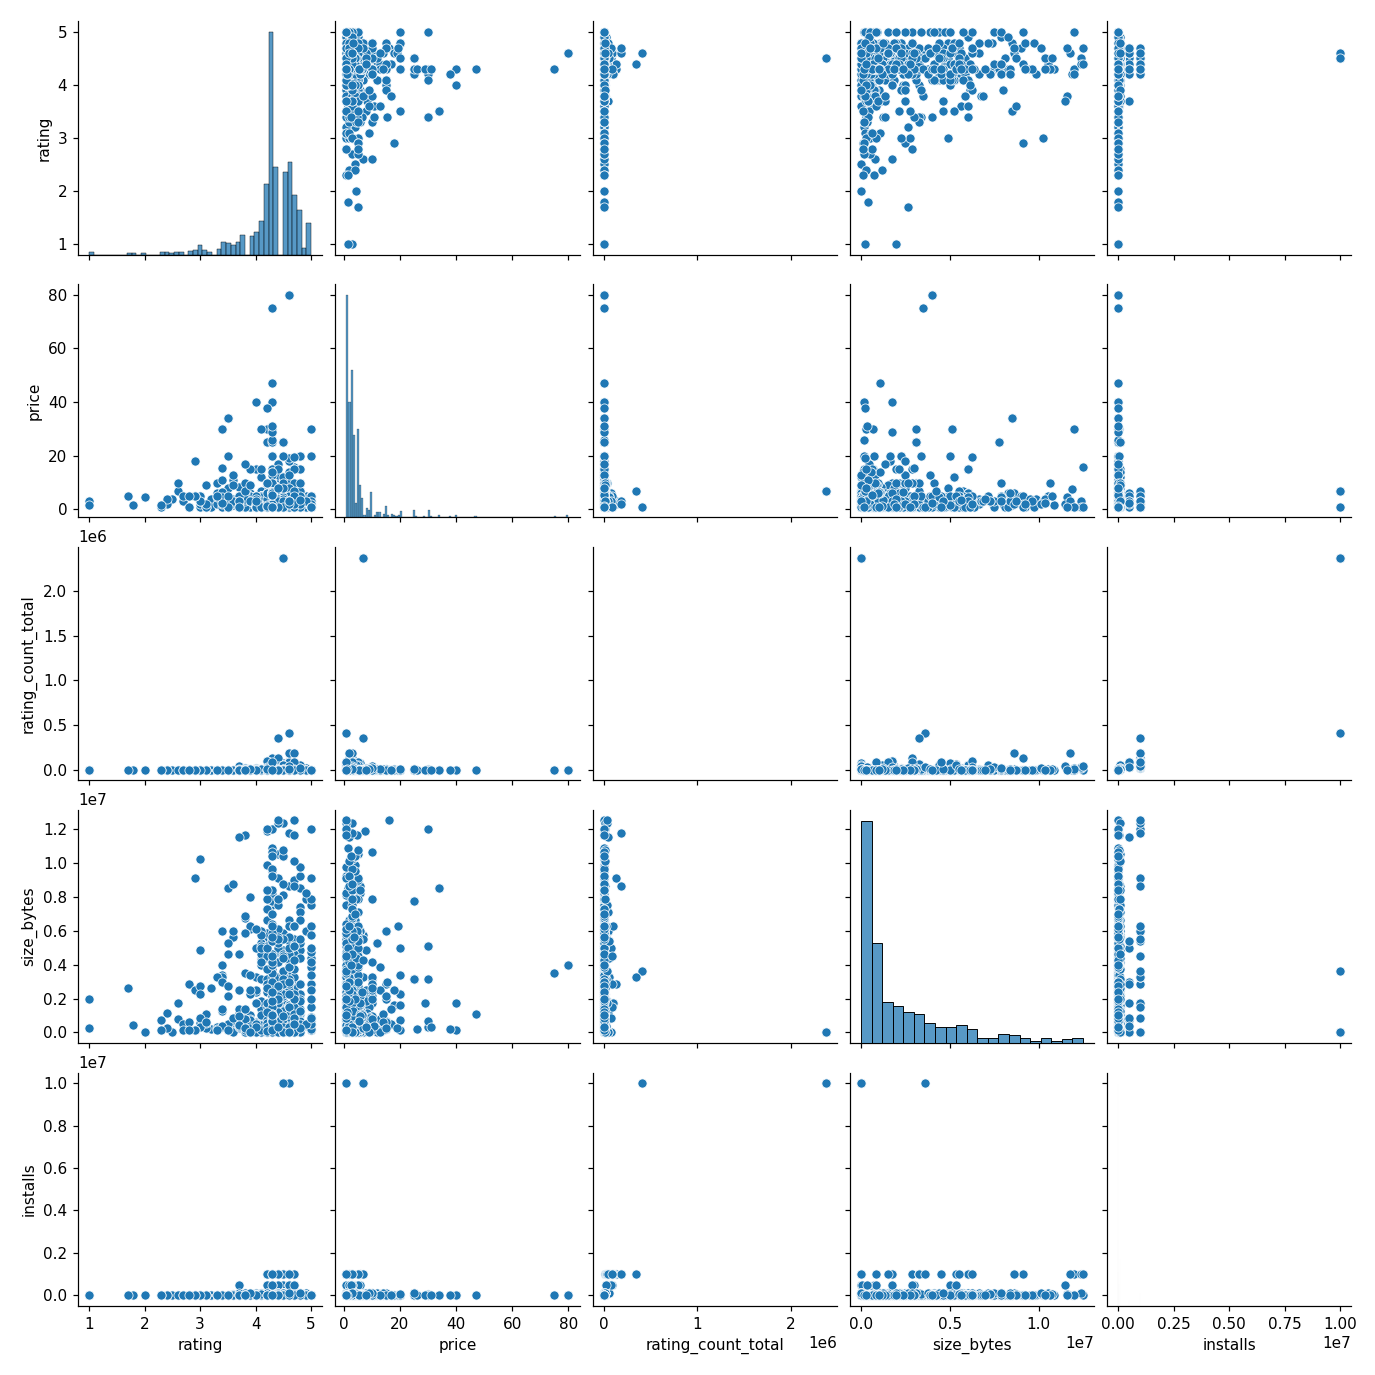

In [11]:
# some apps occure in table multiple times
google_play_store[google_play_store['app'] == 'Minecraft']
sns.pairplot(
    paid_apps_google,
    x_vars=['rating', 'price', 'rating_count_total','size_bytes', 'installs'],
    y_vars=['rating', 'price', 'rating_count_total','size_bytes', 'installs'],
)